<a href="https://colab.research.google.com/github/NaraaBold/ComputerVision/blob/main/Image_processing_basics_for_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Image processing basics**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'compVision/assignments/assignment1/'
FOLDERNAME = ''
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
import os
sys.path.append('/content/drive/MyDrive/{}'.format(FOLDERNAME))
os.chdir('/content/drive/MyDrive/{}'.format(FOLDERNAME))


1.**Images as Pixels**

An image consists of a rectangular array of pixels where each one is assigned a colour. For example, here is an image with 9 pixels, each pixel is assigned a specific colour.

We can represent this image as matrix where each entry is a colour. Colours can be represented in many ways: HEX, RGB, HSL, CYMK. We'll represent a colour by a 3D vector of RGB values. Each value is from 0 to 255. Pixels are indexed from left-to-right, top-to-bottom, so the top-left pixel has index(0,0)

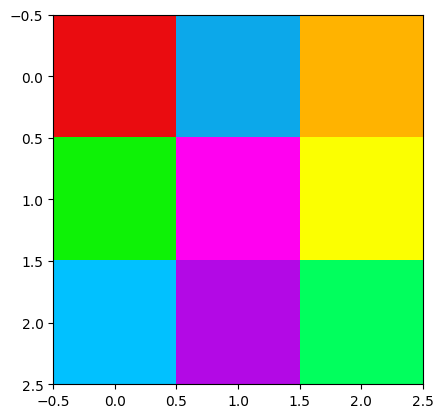

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

image = np.array([
          [ [234, 12, 16], [12, 168, 234], [255, 179, 0] ],
          [ [14, 242, 6],  [255, 1, 240],  [251, 255, 1] ],
          [ [1, 193, 255], [179, 9, 229],  [1, 255, 93] ]
         ])

plt.imshow(image)

Therefore, using RGB vectors to represent colour, one could view an image as 3 matrices, each one corresponding to an RGB channel.


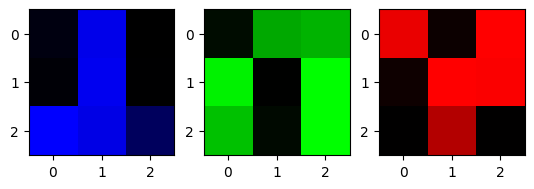

In [ ]:
b = image.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0


g = image.copy()
# set blue and red channels to 0
# your code goes here

r = image.copy()
# set blue and green channels to 0
# your code goes here


fig, axs = plt.subplots(1,3)
axs[0].imshow(r)
axs[1].imshow(g)
axs[2].imshow(b)

1. **Opening, Displaying and Saving Images in Python**

In [ ]:
#Open any image
image_path = ''
img = plt.imread(image_path)

# create figure to plot image to
plt.figure(figsize=(4,4))
plt.imshow(img)

In [ ]:
#Details of Image
print('# of dims: ',img.ndim)     # dimension of an image
print('Img shape: ',img.shape)    # shape of an image
print('Dtype: ',img.dtype)        # type of data stored in image
print('type: ', type(img))        # datatype of image object
print(img[20, 20])                # pixel value at [R, G, B]
print(img[:, :, 2].min())         # min pixel value at channel B

2. **Converting an Image to Gray Scale and Coloring**

To convert an image from colour to gray scale, we just sum the rgb components and rescale out of 255^3. This returns a 2D array (matrix) of gray scale values.

In [ ]:
img_gray = img.sum(axis=-1) / (255*3)    # converting to grayscale

print(img_gray.shape)

# create figure to plot image to
plt.figure(figsize=(4,4))
plt.imshow(img_gray, cmap='gray')

Read more about RGB to Grayscale https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale

In [ ]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [ ]:
#use rgb2gray function and turn your image to gray
img_gray2 = # your code goes here

plt.figure(figsize=(4,4))
plt.imshow(img_gray2, cmap="gray")

Extract R, G, B channel separetaly and plot them.

In [ ]:
img_b = img.copy()
# set green and red channels to 0
#your code goes here

img_g = img.copy()
# set blue and red channels to 0
#your code goes here

img_r = img.copy()
# set blue and green channels to 0
#your code goes here


fig, axs = plt.subplots(1,3)
axs[0].imshow(img_r)
axs[1].imshow(img_g)
axs[2].imshow(img_b)

In [ ]:
#Stack the channels
img_rch = img[:,:,0] # grab just the red channel matrix
img_gch = img[:,:,1] # grab just the green channel matrix
img_bch = img[:,:,2] # grab just the blue channel matrix

img_stacked = np.stack([img_rch, img_gch, img_bch], axis = 2)
plt.imshow(img_stacked)

In [ ]:
#swap channels
#your code goes here

plt.imshow(img_stacked_changed)

Negative image. Read more: https://en.wikipedia.org/wiki/Negative_(photography)

Text(0.5, 1.0, 'Negative of RGB image')

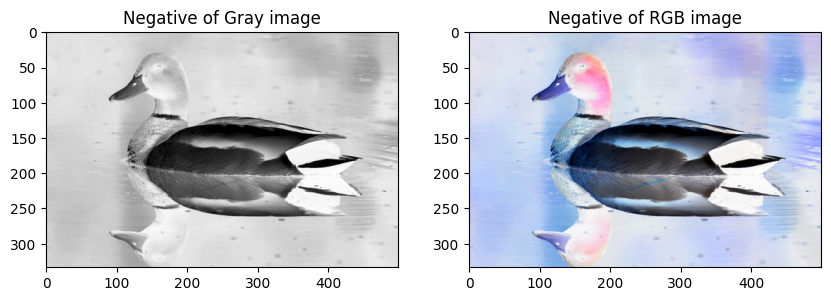

In [ ]:
fig = plt.figure(figsize=(10, 10))
# gray
img_gray = rgb2gray(img)  # convert to grayscale using function above
img_gray_negative = 255 - img_gray
fig.add_subplot(1, 2, 1)
plt.imshow(img_gray_negative, cmap='gray')
plt.title('Negative of Gray image')

# colour
img_negative = 255 - img
fig.add_subplot(1, 2, 2)
plt.imshow(img_negative)
plt.title('Negative of RGB image')

3. **Cropping an Image**

In [ ]:
h, w, c = img.shape # height, width, channels
print(h,w)

In [ ]:
# cropping some pars
img_crop = img[10:h/2,10:w/2,:]
print(img_crop.shape)
plt.imshow(img_crop)
plt.show()

4. **Blending (Summing) two images**


To blend two images we just add the arrays. However, we must keep in mind the RGB values are to be in the range 0 to 255, so we'll use a weighted sum.

In [ ]:
# import another image
image_path2 = ''
img2 = plt.imread(image_path2)

plt.imshow(img2)

uint8


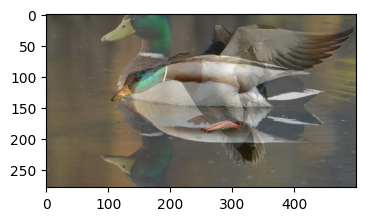

In [ ]:
# resize matrices so they have the same shape
h = min(img.shape[0],img2.shape[0])
w = min(img.shape[1],img2.shape[1])
img = img[-h:,-w:,:]  # crop image from bottom-right
img2 = img2[-h:,-w:,:] # crop image from bottom-right

print(img.dtype)
# uint8
img_blend = (img * 0.5 + img2 * 0.5).astype(np.uint8)   # Blending them in

plt.figure(figsize=(4, 4))
plt.imshow(img_blend)